In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import timeit

start = timeit.default_timer()

data = pd.read_csv('data/highz_train.csv')
print(data)
N = len(data)

data1 = pd.read_csv('data/highz_test.csv')
print(data1)
M = len(data1)

               objid  modelMag_u  modelMag_g  modelMag_r  modelMag_i  \
0       1.237647e+18    22.70128    21.55564    20.74338    19.97239   
1       1.237647e+18    23.23910    21.44343    19.67306    18.94400   
2       1.237647e+18    24.05348    21.24721    19.39289    18.68024   
3       1.237647e+18    26.32478    20.74059    18.99681    18.29084   
4       1.237647e+18    24.76801    19.32076    17.81846    17.23835   
...              ...         ...         ...         ...         ...   
604930  1.237680e+18    23.95901    21.45168    20.99064    20.83455   
604931  1.237680e+18    26.08886    22.08654    21.42736    21.39464   
604932  1.237680e+18    24.30561    23.59575    21.74487    20.60606   
604933  1.237680e+18    25.70489    22.18283    21.30940    20.22876   
604934  1.237681e+18    21.34051    20.64733    20.40584    20.45839   

        modelMag_z  fiberMag_u  fiberMag_g  fiberMag_r  fiberMag_i  ...  \
0         19.65203    23.26064    22.38317    21.52284    20

In [2]:
#Data Cleaning
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values =-9999, strategy='most_frequent')
Imputer.fit(data.values)
Imputer.transform(data.values)

Imputer = SimpleImputer(missing_values =0, strategy='most_frequent')
Imputer.fit(data.values)
Imputer.transform(data.values)

Imputer = SimpleImputer(missing_values =-9999, strategy='most_frequent')
Imputer.fit(data1.values)
Imputer.transform(data1.values)

Imputer = SimpleImputer(missing_values =0, strategy='most_frequent')
Imputer.fit(data1.values)
Imputer.transform(data1.values)

array([[1.2400000e+18, 2.4977000e+01, 2.2830400e+01, ..., 2.2088230e+01,
        2.0692925e+01, 1.9959675e+01],
       [1.2400000e+18, 2.1173680e+01, 2.0482880e+01, ..., 2.0863395e+01,
        1.9759760e+01, 1.9296955e+01],
       [1.2400000e+18, 2.3485650e+01, 2.2147790e+01, ..., 2.2016545e+01,
        2.1031840e+01, 2.0339535e+01],
       ...,
       [1.2400000e+18, 2.3084840e+01, 2.0177980e+01, ..., 2.0379490e+01,
        1.9249300e+01, 1.8697310e+01],
       [1.2400000e+18, 2.3562280e+01, 2.3582470e+01, ..., 2.2993095e+01,
        2.1617975e+01, 2.0716500e+01],
       [1.2400000e+18, 2.5338920e+01, 2.2034830e+01, ..., 2.2001675e+01,
        2.0602165e+01, 1.9857145e+01]])

Text(0, 0.5, 'Number of samples')

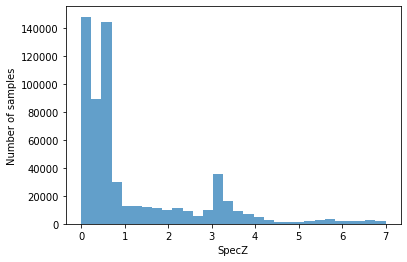

In [3]:
plt.hist(data['redshift'], bins=30, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [4]:
#Refered from base paper. Topic-->[Logarithmic Domain] Pg 4
c=1
data['redshift1']=c*np.log(data.redshift+1)

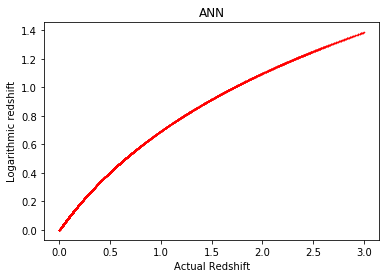

In [5]:
#plotting the graph of actual redshift vs logarithmic redshift
plt.scatter(data['redshift'].tolist()[:25000], data['redshift1'].tolist()[:25000], s=0.1, color="red")
plt.xlabel("Actual Redshift")
plt.ylabel("Logarithmic redshift")
plt.title("ANN")
plt.show()

In [6]:
'''from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# define min max scaler and standard scalar
scaler = MinMaxScaler()
scaler1 = StandardScaler()

# transform data
scaler.fit_transform(data.values)
scaler.fit_transform(data1.values)

scaler1.fit_transform(data.values)
scaler1.fit_transform(data1.values)'''

'from sklearn.preprocessing import MinMaxScaler\nfrom sklearn.preprocessing import StandardScaler\n\n# define min max scaler and standard scalar\nscaler = MinMaxScaler()\nscaler1 = StandardScaler()\n\n# transform data\nscaler.fit_transform(data.values)\nscaler.fit_transform(data1.values)\n\nscaler1.fit_transform(data.values)\nscaler1.fit_transform(data1.values)'

In [7]:
#Check Page 3 and 4 from base paper
# Feature matrix

X=np.zeros((N,30))
X[: ,0] = data['modelMag_u']
X[: ,1] = data['modelMag_g']
X[: ,2] = data['modelMag_r']
X[: ,3] = data['modelMag_i']
X[: ,4] = data['modelMag_z']
X[: ,5] = data['modelMag_u'] - data['modelMag_g']
X[: ,6] = data['modelMag_g'] - data['modelMag_r']
X[: ,7] = data['modelMag_r'] - data['modelMag_i']
X[: ,8] = data['modelMag_i'] - data['modelMag_z']
X[: ,9] = data['fiberMag_u']
X[: ,10] = data['fiberMag_g']
X[: ,11] = data['fiberMag_r']
X[: ,12] = data['fiberMag_i']
X[: ,13] = data['fiberMag_z']
X[: ,14] = data['fiberMag_u'] - data['fiberMag_g']
X[: ,15] = data['fiberMag_g'] - data['fiberMag_r']
X[: ,16] = data['fiberMag_r'] - data['fiberMag_i']
X[: ,17] = data['fiberMag_i'] - data['fiberMag_z']
X[: ,18] = data['petroR50_r'] / data['petroR90_r']
X[: ,19] = data['petroR50_z'] / data['petroR90_z']
X[: ,20] = data['r'] - data['i']
X[: ,21] = data['i'] - data['z']
X[: ,22] = data['mmug']
X[: ,23] = data['mmgr']
X[: ,24] = data['mmri']
X[: ,25] = data['mmiz']
X[: ,26] = data['mfug']
X[: ,27] = data['mfgr']
X[: ,28] = data['mfri']
X[: ,29] = data['mfiz']
print(X)

y = data['redshift1']

Z = np.zeros((M,30))
Z[: ,0] = data1['modelMag_u']
Z[: ,1] = data1['modelMag_g']
Z[: ,2] = data1['modelMag_r']
Z[: ,3] = data1['modelMag_i']
Z[: ,4] = data1['modelMag_z']
Z[: ,5] = data1['modelMag_u'] - data1['modelMag_g']
Z[: ,6] = data1['modelMag_g'] - data1['modelMag_r']
Z[: ,7] = data1['modelMag_r'] - data1['modelMag_i']
Z[: ,8] = data1['modelMag_i'] - data1['modelMag_z']
Z[: ,9] = data1['fiberMag_u']
Z[: ,10] = data1['fiberMag_g']
Z[: ,11] = data1['fiberMag_r']
Z[: ,12] = data1['fiberMag_i']
Z[: ,13] = data1['fiberMag_z']
Z[: ,14] = data1['fiberMag_u'] - data1['fiberMag_g']
Z[: ,15] = data1['fiberMag_g'] - data1['fiberMag_r']
Z[: ,16] = data1['fiberMag_r'] - data1['fiberMag_i']
Z[: ,17] = data1['fiberMag_i'] - data1['fiberMag_z']
Z[: ,18] = data1['petroR50_r'] / data1['petroR90_r']
Z[: ,19] = data1['petroR50_z'] / data1['petroR90_z']
Z[: ,20] = data1['r'] - data1['i']
Z[: ,21] = data1['i'] - data1['z']
Z[: ,22] = data1['mmug']
Z[: ,23] = data1['mmgr']
Z[: ,24] = data1['mmri']
Z[: ,25] = data1['mmiz']
Z[: ,26] = data1['mfug']
Z[: ,27] = data1['mfgr']
Z[: ,28] = data1['mfri']
Z[: ,29] = data1['mfiz']
print(Z)

train_no=int((3*N)/4)
X_train=X[:train_no,:]
y_train=y[:train_no]
X_test=X[train_no:,:]
y_test=y[train_no:]
Z_test=Z[:,:]
print('Training data has',len(X_train.tolist()),'samples')
print('Test data has',len(Z_test.tolist()),'samples')
print(y_train)

[[22.70128  21.55564  20.74338  ... 21.953005 21.13771  20.60289 ]
 [23.2391   21.44343  19.67306  ... 21.472625 20.23237  19.65959 ]
 [24.05348  21.24721  19.39289  ... 21.21817  19.93854  19.384555]
 ...
 [24.30561  23.59575  21.74487  ... 23.248225 21.827315 20.866255]
 [25.70489  22.18283  21.3094   ... 22.73945  21.7061   20.624625]
 [21.34051  20.64733  20.40584  ... 20.96003  20.842215 20.83043 ]]
[[24.977    22.8304   20.54547  ... 22.08823  20.692925 19.959675]
 [21.17368  20.48288  18.87302  ... 20.863395 19.75976  19.296955]
 [23.48565  22.14779  20.8874   ... 22.016545 21.03184  20.339535]
 ...
 [23.08484  20.17798  18.5542   ... 20.37949  19.2493   18.69731 ]
 [23.56228  23.58247  21.77236  ... 22.993095 21.617975 20.7165  ]
 [25.33892  22.03483  20.26886  ... 22.001675 20.602165 19.857145]]
Training data has 453701 samples
Test data has 500000 samples
0         0.518778
1         0.345057
2         0.345814
3         0.335896
4         0.226204
            ...   
453696  

In [8]:
'''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=10)
selected_features = selector.fit_transform(train_features, train_labels)
f_score_indexes = (-selector.scores_).argsort()[:10]

print(f_score_indexes)'''

'from sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import f_classif\n\nselector = SelectKBest(f_classif, k=10)\nselected_features = selector.fit_transform(train_features, train_labels)\nf_score_indexes = (-selector.scores_).argsort()[:10]\n\nprint(f_score_indexes)'

In [9]:
'''#Feature Elimination

X = np.zeros((N,10))
X[: ,0] = data['modelMag_r']
X[: ,1] = data['modelMag_i']
X[: ,2] = data['modelMag_z']
X[: ,3] = data['fiberMag_r']
X[: ,4] = data['fiberMag_i']
X[: ,5] = data['petroR50_r'] / data['petroR90_r']
X[: ,6] = data['mmri']
X[: ,7] = data['mmiz']
X[: ,8] = data['mfri']
X[: ,9] = data['mfiz']
print(X)

y = data['redshift1']

train_no=int((3*N)/4)
X_train=X[:train_no,:]
y_train=y[:train_no]
X_test=X[train_no:,:]
y_test=y[train_no:]
print('Training data has %d samples'%(train_no))
print('Test data has %d samples'%(N-train_no))
print(y_train)'''

"#Feature Elimination\n\nX = np.zeros((N,10))\nX[: ,0] = data['modelMag_r']\nX[: ,1] = data['modelMag_i']\nX[: ,2] = data['modelMag_z']\nX[: ,3] = data['fiberMag_r']\nX[: ,4] = data['fiberMag_i']\nX[: ,5] = data['petroR50_r'] / data['petroR90_r']\nX[: ,6] = data['mmri']\nX[: ,7] = data['mmiz']\nX[: ,8] = data['mfri']\nX[: ,9] = data['mfiz']\nprint(X)\n\ny = data['redshift1']\n\ntrain_no=int((3*N)/4)\nX_train=X[:train_no,:]\ny_train=y[:train_no]\nX_test=X[train_no:,:]\ny_test=y[train_no:]\nprint('Training data has %d samples'%(train_no))\nprint('Test data has %d samples'%(N-train_no))\nprint(y_train)"

In [10]:
#Building the neural network
#importing the keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


model = Sequential()

# The Input Layer :
model.add(Dense(output_dim = 960, kernel_initializer='normal',input_dim = 30, W_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(keras.layers.Dropout(0.1))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu', W_regularizer=regularizers.l2(0.01)))
model.add(Dense(256, kernel_initializer='normal',activation='relu', W_regularizer=regularizers.l2(0.01)))
model.add(Dense(256, kernel_initializer='normal',activation='relu', W_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.1))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#compiling the model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse'])

#fitting the model
history = model.fit(X_train, y_train, batch_size=100, validation_data=(X_test, y_test), nb_epoch = 10)

Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="normal", input_dim=30, activation="relu", units=960, kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg...)`
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserW

Train on 453701 samples, validate on 151234 samples
Epoch 1/10
453701/453701 [==============================] - 75s 165us/step - loss: 0.9919 - mse: 566.8438 - val_loss: 0.9600 - val_mse: 1.7107
Epoch 2/10
453701/453701 [==============================] - 77s 169us/step - loss: 0.1616 - mse: 1.5012 - val_loss: 0.8008 - val_mse: 0.8668
Epoch 3/10
453701/453701 [==============================] - 79s 173us/step - loss: 0.1353 - mse: 0.1231 - val_loss: 0.8231 - val_mse: 0.9103
Epoch 4/10
453701/453701 [==============================] - 79s 174us/step - loss: 0.1295 - mse: 0.0703 - val_loss: 0.8835 - val_mse: 1.0523
Epoch 5/10
453701/453701 [==============================] - 79s 175us/step - loss: 0.1256 - mse: 0.0775 - val_loss: 0.5374 - val_mse: 0.4120
Epoch 6/10
453701/453701 [==============================] - 77s 169us/step - loss: 0.1248 - mse: 0.1841 - val_loss: 0.9873 - val_mse: 1.2224
Epoch 7/10
453701/453701 [==============================] - 79s 173us/step - loss: 0.1218 - mse: 0.1

In [11]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


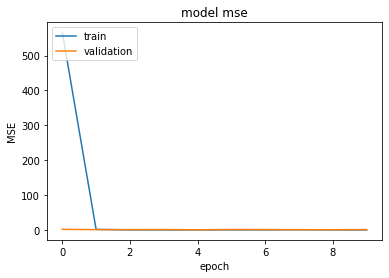

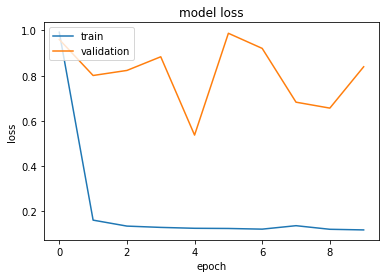

In [13]:
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
#predicting the test set and validation set
y_pred = model.predict(Z_test)
y_pred1= model.predict(X_test)

In [15]:
#Refered from base paper. Page 5
e = 2.71828
y_pred=2.71828**(y_pred-1)
y_pred1=2.71828**(y_pred1-1)
print("The predicted z values are",y_pred)

The predicted z values are [[0.47242096]
 [0.407482  ]
 [0.45997134]
 ...
 [0.4007403 ]
 [0.5220553 ]
 [0.45695013]]


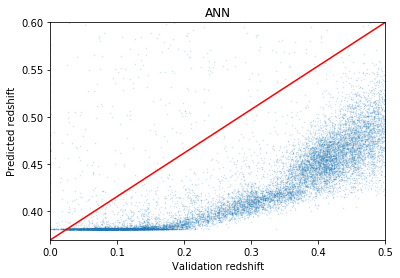

In [24]:
#traning vs validation redshift
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title("ANN")
ax1.scatter(y_test.tolist()[:25000], y_pred1.tolist()[:25000], alpha=0.2, s=0.2)
ax1.set_xlabel("Validation redshift")
ax1.set_ylabel("Predicted redshift")
ax1.plot([0,.5], [0.37,.6], '-r')
ax1.set_xlim(0.0, .5)
ax1.set_ylim(0.37, .6)
plt.show()

Explained variance (best possible score is 1.0, lower values are worse): -0.0377226712916896
Mean Absolute Error (best is 0.0): 0.25901065838617887
Mean Squared Error (best is 0.0): 0.1167050433183672
R2 score (best is 1.0): -0.03976252038786687
Root mean Squared Error : 0.34162119857872875
Model Bias Score: 0.8775709516586366


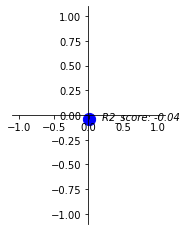

Time:  37.11562817 minutes


In [17]:
#Evaluating the model
from sklearn import metrics
from math import sqrt

var = metrics.explained_variance_score(y_test.tolist()[:25000], y_pred.tolist()[:25000])
mae = metrics.mean_absolute_error(y_test.tolist()[:25000], y_pred.tolist()[:25000])
mse = metrics.mean_squared_error(y_test.tolist()[:25000], y_pred.tolist()[:25000])
r2 = metrics.r2_score(y_test.tolist()[:25000], y_pred.tolist()[:25000])
rms = sqrt(metrics.mean_squared_error(y_test.tolist()[:25000], y_pred.tolist()[:25000]))
bias = (1/N)*sum(((np.subtract(y_pred.tolist()[:25000],y_test.tolist()[:25000]))/(np.subtract(1,y_test.tolist()[:25000]))), M)

print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print('Root mean Squared Error :', rms)
print('Model Bias Score:', bias.mean())

x = np.arange(-1., 1., 0.018)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x,x,color='none')
plt.scatter(0,r2,color='blue',s=150)
plt.text(.2,r2, "R2_score: {:0.2f}".format(r2), style='italic')
plt.show()

stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  

In [18]:
y_pred = pd.DataFrame(y_pred, columns=['z_predictions'])
Z_test = pd.DataFrame(Z_test, columns=['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','mm_u-g','mm_g-r','mm_r-i','mm_i-z', 'fiberMag_u','fiberMag_g','fiberMag_r','fiberMag_i','fiberMag_z','fm_u-g','fm_g-r','fm_r-i','fm_i-z','p50r/p90r','p50z/p90z','r-i','i-z','mmug','mmgr','mmri','mmiz','mfug','mfgr','mfri','mfiz'])
result = Z_test.join(y_pred)
result.to_csv('data/Z_pred-result.csv', index='false')